### Importing Necessary

In [171]:
# Importing Necessary Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#### Find the information about dataset from the below Lind
- https://www.kaggle.com/datasets/ertugrulesol/online-retail-data

In [106]:
df = pd.read_csv('https://github.com/Namachivayam2001/Public_Datasets/raw/main/synthetic_online_retail_data.csv')

In [107]:
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


## Let's do data inspection

In [108]:
print(f'Rows from the dataset: {df.shape[0]}')
print(f'Columns from the dataset: {df.shape[1]}')

Rows from the dataset: 1000
Columns from the dataset: 13


In [109]:
# Spliting numarical and categorical columns
all_columns = df.columns.tolist()
numarical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [110]:
print(f'columns: {all_columns}')
print(f'Number of numarical columns in dataset: {len(numarical_columns)}')
print(f'Numarical columns: {numarical_columns}')
print(f'Number of categorical columns in dataset: {len(categorical_columns)}')
print(f'Categorical columns: {categorical_columns}')

columns: ['customer_id', 'order_date', 'product_id', 'category_id', 'category_name', 'product_name', 'quantity', 'price', 'payment_method', 'city', 'review_score', 'gender', 'age']
Number of numarical columns in dataset: 7
Numarical columns: ['customer_id', 'product_id', 'category_id', 'quantity', 'price', 'review_score', 'age']
Number of categorical columns in dataset: 6
Categorical columns: ['order_date', 'category_name', 'product_name', 'payment_method', 'city', 'gender']


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [112]:
df.describe()

,customer_id,product_id,category_id,quantity,price,review_score,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,799.000000,1000.000000
mean,55490.723000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000
std,25910.185857,261.737704,14.370303,1.413573,139.194688,1.239469,16.569992
min,10201.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000
25%,33857.000000,311.750000,20.000000,2.000000,128.525000,3.000000,32.000000
50%,54619.500000,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000
75%,77848.500000,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000
max,99923.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000


In [113]:
df.isnull().sum()

,0
customer_id,0
order_date,0
product_id,0
category_id,0
category_name,0
product_name,0
quantity,0
price,0
payment_method,0
city,0


### Let's Visualize the null values in a dataset

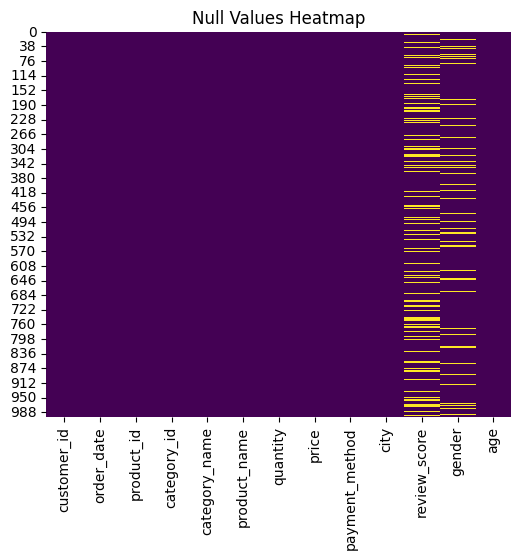

In [114]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

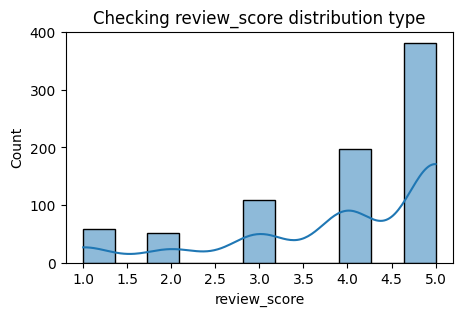

In [115]:
plt.figure(figsize=(5, 3))
sns.histplot(df.review_score, kde=True)
plt.title('Checking review_score distribution type')
plt.show()

In [116]:
print(f'Unique values in review_score: {df.review_score.nunique()}')

Unique values in review_score: 5


After the histogram, We found **review_score is categorical** column **even the dtype is number**

In [117]:
null_columns = df.columns[df.isnull().any()]
for column in null_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-117-e95ea1502eaf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [118]:
df.isnull().sum()

,0
customer_id,0
order_date,0
product_id,0
category_id,0
category_name,0
product_name,0
quantity,0
price,0
payment_method,0
city,0


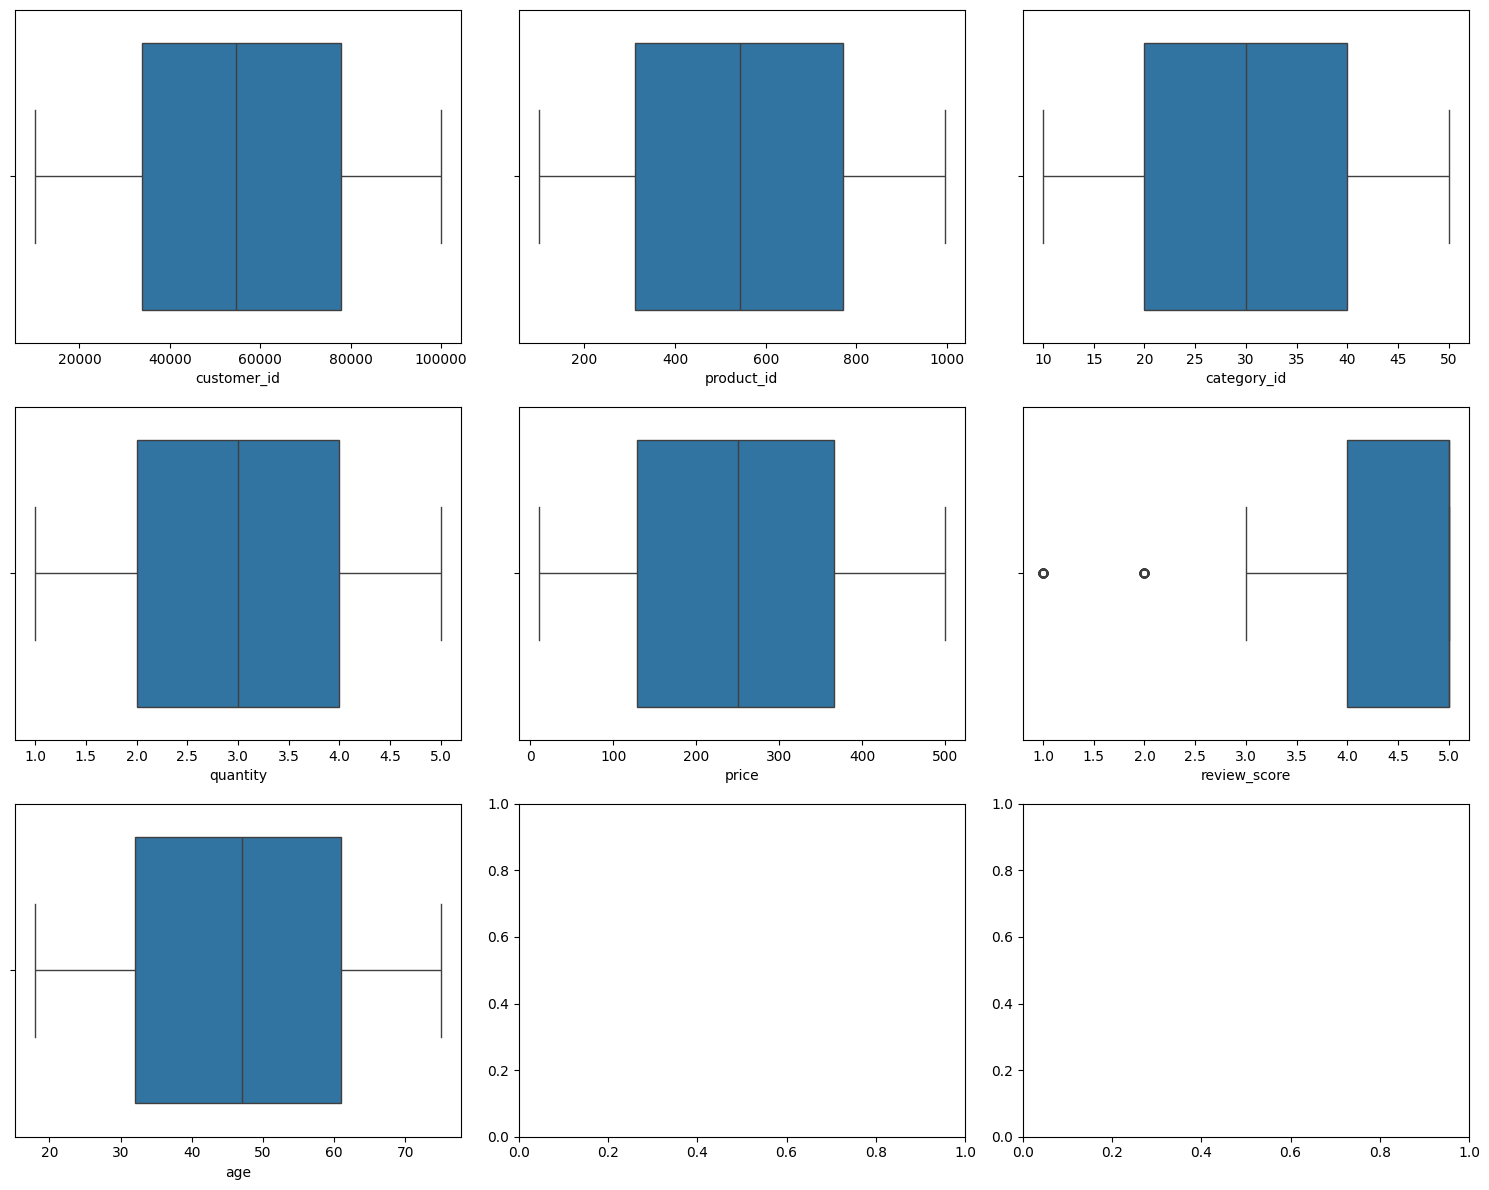

In [119]:
cols = 3
rows = (len(numarical_columns) + cols - 1) // cols

fig, axis = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axis = axis.flatten()

for i, column in enumerate(numarical_columns):
    sns.boxplot(x=df[column], ax=axis[i])

plt.tight_layout()
plt.show()

In [120]:
df.review_score.unique()

array([1., 5., 3., 4., 2.])

More than **700** records are in **review_score** column is in **3 to 5** so the above graph shows **less than 3 is outliers**, but ethicaly **below 3 is not a outliers**

In [121]:
# encoder = LabelEncoder()

# encoder.fit(df['category_name'].unique())
# df['category_name'] = encoder.transform(df['category_name'])

# print(f'classes: {encoder.classes_}')
# print(f'Encoded values: {encoder.transform(encoder.classes_)}')

In [122]:
total_count = df[column].shape[0]

for column in categorical_columns:
    unique_count = df[column].nunique()
    unique_percentage = (unique_count / total_count) * 100

    print(f"{column}: {unique_count} unique values ({unique_percentage:.2f}%)")



order_date: 342 unique values (34.20%)
category_name: 5 unique values (0.50%)
product_name: 25 unique values (2.50%)
payment_method: 3 unique values (0.30%)
city: 962 unique values (96.20%)
gender: 2 unique values (0.20%)


In [123]:
# Step 1: Convert the column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')  # handles invalid formats gracefully

# Step 2: Create a new column for month
df['order_month'] = df['order_date'].dt.month  # gives month as number (1–12)

# Optional: If you want the full month name
# df['month_name'] = df['date'].dt.strftime('%B')

In [124]:
numarical_columns_with_order_month = numarical_columns + ['order_month']
numarical_columns_with_order_month_without_ids = [col for col in numarical_columns_with_order_month if col not in ['customer_id', 'product_id', 'category_id'] ]
categorical_columns_without_order_date = [col for col in categorical_columns if col != 'order_date']

df[list(numarical_columns_with_order_month_without_ids + categorical_columns_without_order_date)].head()

,quantity,price,review_score,age,order_month,category_name,product_name,payment_method,city,gender
0,2,373.36,1.0,56,12,Electronics,Smartphone,Credit Card,New Oliviaberg,F
1,5,299.34,5.0,59,6,Sports & Outdoors,Soccer Ball,Credit Card,Port Matthew,M
2,5,23.00,5.0,64,2,Sports & Outdoors,Tent,Credit Card,West Sarah,F
3,2,230.11,5.0,34,10,Books & Stationery,Story Book,Bank Transfer,Hernandezburgh,M
4,4,176.72,1.0,33,5,Fashion,Skirt,Credit Card,Jenkinshaven,F


In [125]:
category_mappings = {}  # To store column-wise mappings
encoder = LabelEncoder()


for column in categorical_columns_without_order_date:
  encoder.fit(df[column].unique())
  df[column] = encoder.transform(df[column])

  # Store mapping: category -> encoded value
  mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
  category_mappings[column] = mapping


In [126]:
for cat_dict in category_mappings.keys():
  print(f'{cat_dict}: {category_mappings[cat_dict]}')

category_name: {'Books & Stationery': np.int64(0), 'Electronics': np.int64(1), 'Fashion': np.int64(2), 'Home & Living': np.int64(3), 'Sports & Outdoors': np.int64(4)}
product_name: {'Basketball': np.int64(0), 'Blanket': np.int64(1), 'Carpet': np.int64(2), 'Dress': np.int64(3), 'Eraser': np.int64(4), 'Headphones': np.int64(5), 'Laptop': np.int64(6), 'Notebook': np.int64(7), 'Novel': np.int64(8), 'Painting': np.int64(9), 'Pants': np.int64(10), 'Pen': np.int64(11), 'Pillow': np.int64(12), 'Running Shoes': np.int64(13), 'Shirt': np.int64(14), 'Skirt': np.int64(15), 'Smartphone': np.int64(16), 'Smartwatch': np.int64(17), 'Soccer Ball': np.int64(18), 'Story Book': np.int64(19), 'T-shirt': np.int64(20), 'Tablet': np.int64(21), 'Tent': np.int64(22), 'Vase': np.int64(23), 'Yoga Mat': np.int64(24)}
payment_method: {'Bank Transfer': np.int64(0), 'Cash on Delivery': np.int64(1), 'Credit Card': np.int64(2)}
city: {'Adamsbury': np.int64(0), 'Adamsfort': np.int64(1), 'Adrianmouth': np.int64(2), 'Alex

In [127]:
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,order_month
0,13542,2024-12-17,784,10,1,16,2,373.36,2,522,1.0,0,56,12
1,23188,2024-06-01,682,50,4,18,5,299.34,2,668,5.0,1,59,6
2,55098,2025-02-04,684,50,4,22,5,23.00,2,942,5.0,0,64,2
3,65208,2024-10-28,204,40,0,19,2,230.11,0,244,5.0,1,34,10
4,63872,2024-05-10,202,20,2,15,4,176.72,2,281,1.0,0,33,5


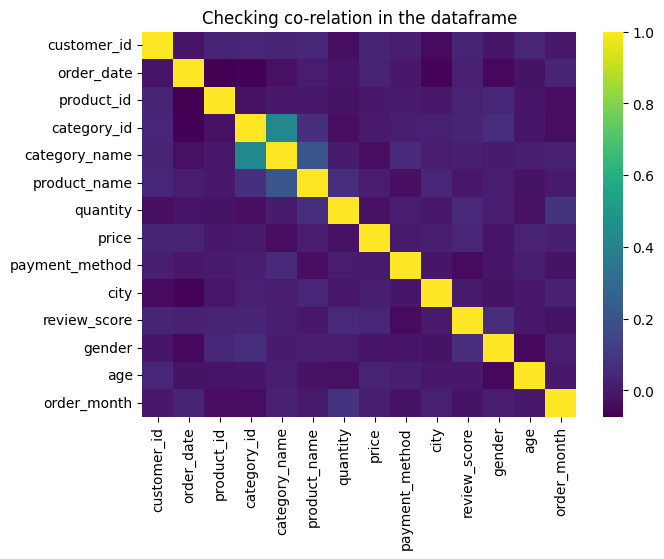

In [136]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), cmap='viridis')
plt.title('Checking co-relation in the dataframe')
plt.show()

✅ **Step-by-step Manual Calculation**  
Let’s use the formula for **Simple Linear Regression**:

### 🔁 Linear Regression Equation

$$
\hat{y} = w \cdot x + b
$$

---

### 1. **Slope (w)**

$$
w = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

Where:
- `xᵢ`: individual value from the independent variable  
- `x̄`: mean of all xᵢ  
- `yᵢ`: individual value from the dependent variable  
- `ȳ`: mean of all yᵢ

---

### 2. **Intercept (b)**

$$
b = \bar{y} - w \cdot \bar{x}
$$


### Let's create a Simple Regression Model

In [157]:
simple_linear_model = LinearRegression()

In [158]:
x = df[['age']][:10]
y = df['category_name'][:10]
df[['age', 'category_name']][:10]

,age,category_name
0,56,1
1,59,4
2,64,4
3,34,0
4,33,2
5,21,1
6,57,1
7,60,4
8,69,3
9,34,3




### 🔢 Step 3: Calculate Mean of x and y

$$
\bar{x} = \frac{56 + 59 + 64 + 34 + 33 + 21 + 57 + 60 + 69 + 34}{10} = \frac{487}{10} = 48.7
$$

$$
\bar{y} = \frac{1 + 4 + 4 + 0 + 2 + 1 + 1 + 4 + 3 + 3}{10} = \frac{23}{10} = 2.3
$$

---

### 📋 Full Table with Calculations

| x   | y | x - x̄  | y - ȳ  | (x - x̄)² | (x - x̄)(y - ȳ) |
|-----|---|--------|--------|-----------|------------------|
| 56  | 1 | 7.3    | -1.3   | 53.29     | -9.49            |
| 59  | 4 | 10.3   | 1.7    | 106.09    | 17.51            |
| 64  | 4 | 15.3   | 1.7    | 234.09    | 26.01            |
| 34  | 0 | -14.7  | -2.3   | 216.09    | 33.81            |
| 33  | 2 | -15.7  | -0.3   | 246.49    | 4.71             |
| 21  | 1 | -27.7  | -1.3   | 767.29    | 36.01            |
| 57  | 1 | 8.3    | -1.3   | 68.89     | -10.79           |
| 60  | 4 | 11.3   | 1.7    | 127.69    | 19.21            |
| 69  | 3 | 20.3   | 0.7    | 412.09    | 14.21            |
| 34  | 3 | -14.7  | 0.7    | 216.09    | -10.29           |
|     |   |        |        | **2447.10** | **120.90**       |

---

### 🧮 Final Calculations

#### **Slope (w)**

$$
w = \frac{120.90}{2447.10} \approx 0.0494
$$

#### **Intercept (b)**

$$
b = 2.3 - (0.0494 \cdot 48.7) \approx -0.1078
$$

---

### ✅ Final Linear Regression Equation

$$
\hat{y} = 0.0494 \cdot x - 0.1078
$$


In [159]:
simple_linear_model.fit(x,y)

LinearRegression()

In [160]:
slope = simple_linear_model.coef_[0]        # Coefficient (slope)
intercept = simple_linear_model.intercept_  # Intercept

print(f"Linear Equation: y = {slope:.2f}x + {intercept:.2f}")


Linear Equation: y = 0.05x + -0.11


In [172]:
y_pred = simple_linear_model.predict(x)

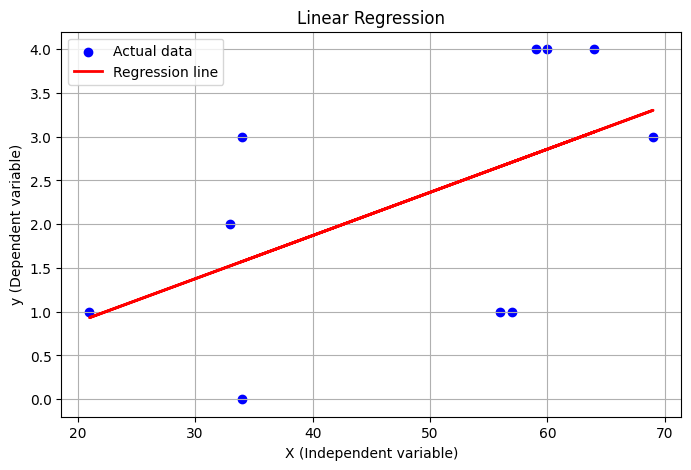

In [170]:
plt.figure(figsize=(8,5))

# Scatter plot of original data
plt.scatter(x, y, color='blue', label='Actual data')

# Plot regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')

plt.xlabel('X (Independent variable)')
plt.ylabel('y (Dependent variable)')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


✅ **Error Metrics in Regression Models**

Here are the most common ways to evaluate a regression model:

---

### ✅ 1. **Mean Absolute Error (MAE)**

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

- **MAE** is the average of the absolute differences between actual and predicted values.
- It’s simple to understand and **less sensitive to outliers**.

---

### ✅ 2. **Mean Squared Error (MSE)**

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **MSE** squares the errors, so **larger errors have more impact**.
- It’s commonly used during **model training/optimization**.

---

### ✅ 3. **Root Mean Squared Error (RMSE)**

$$
RMSE = \sqrt{MSE}
$$

- **RMSE** brings the error back to the same **unit as the target variable**.
- Easier to interpret than MSE.

---

### ✅ 4. **R² Score (Coefficient of Determination)**

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

- Explains the **proportion of variance** in the target variable that is captured by the model.
- Ranges from **0 to 1** (closer to 1 means better fit).


### Let's Evaluate the model

In [173]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

MAE: 1.049
MSE: 1.413
RMSE: 1.189
R² Score: 0.297
